C:\Users\Preetham\anaconda3\lib\site-packages\cryptography\x509\base.py:521: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_der_x509_certificate(data)


The connection has been established successfully
Collection is empty. Loading data from FDA API...
Data loaded successfully from FDA API.
Data loaded from MongoDB collection into a DataFrame.
Null Value Count before pre-processing:
_id                               0
country                           0
city                              0
address_1                         2
reason_for_recall                 0
address_2                     22357
product_quantity               1617
code_info                        22
center_classification_date        0
distribution_pattern              0
state                           313
product_description               0
report_date                       0
classification                    0
openfda                           0
recalling_firm                    0
recall_number                     1
initial_firm_notification         7
product_type                      0
event_id                          0
more_code_info                23739
recall_initi

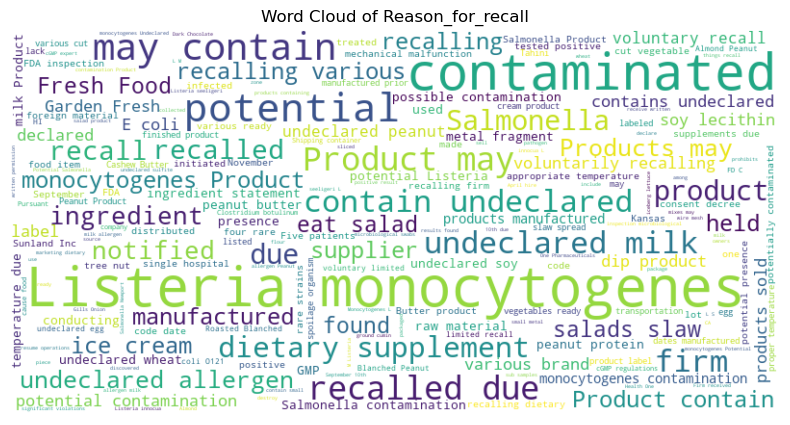

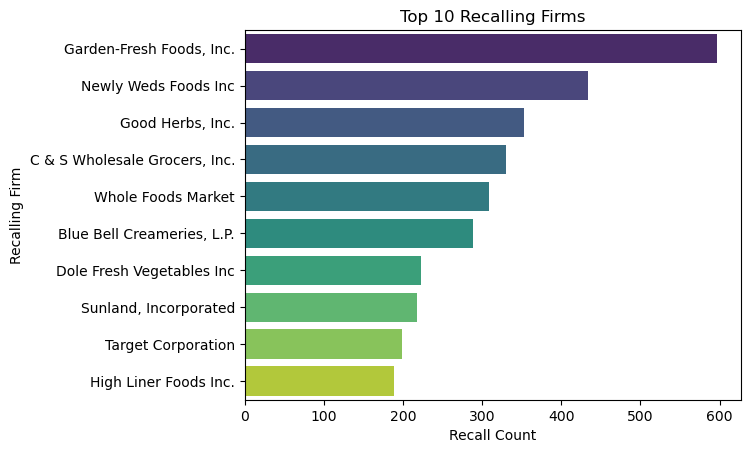

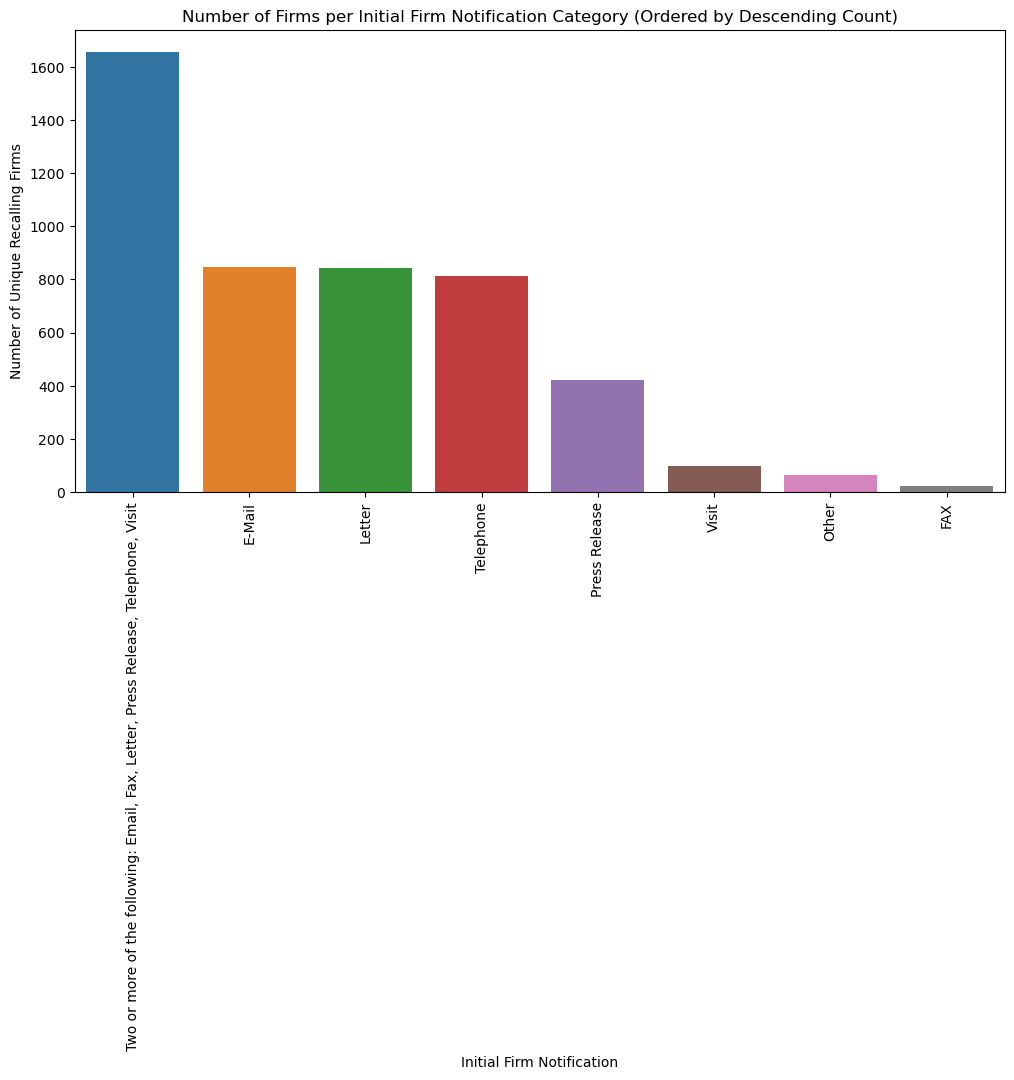

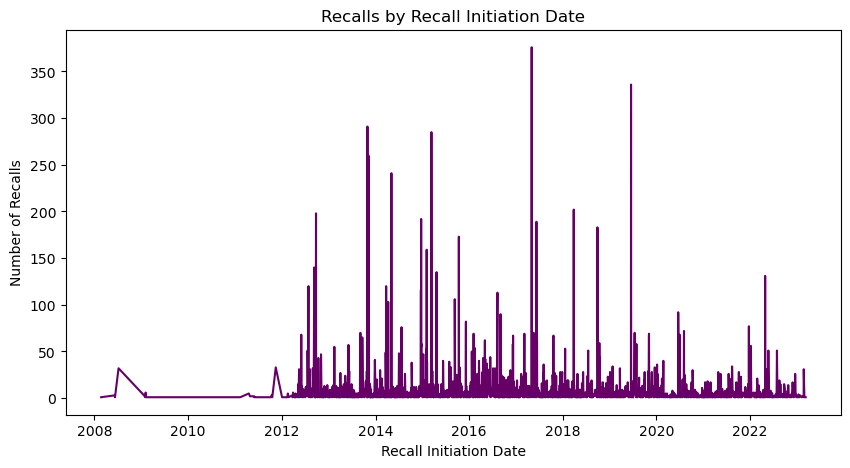

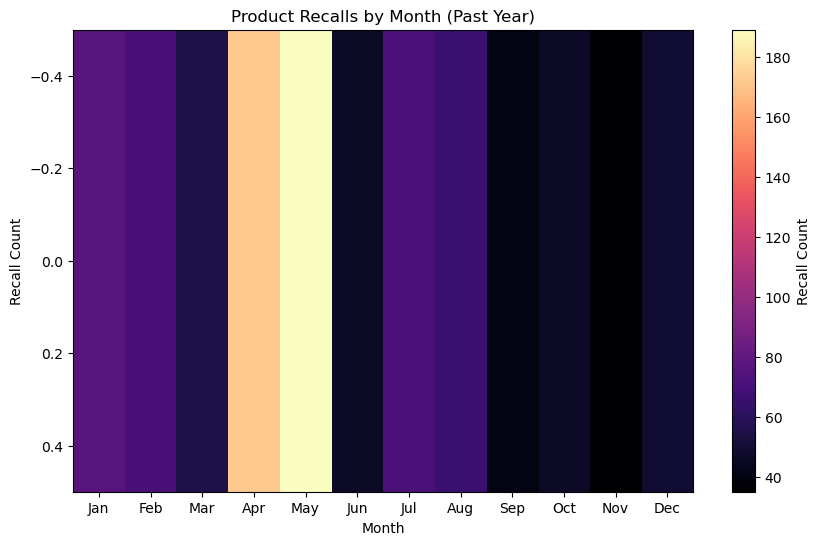

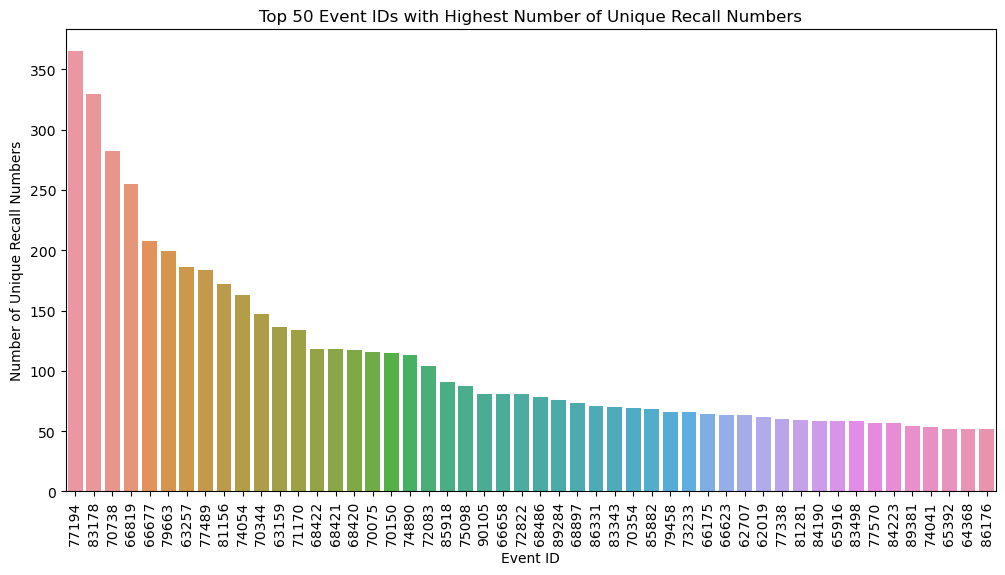

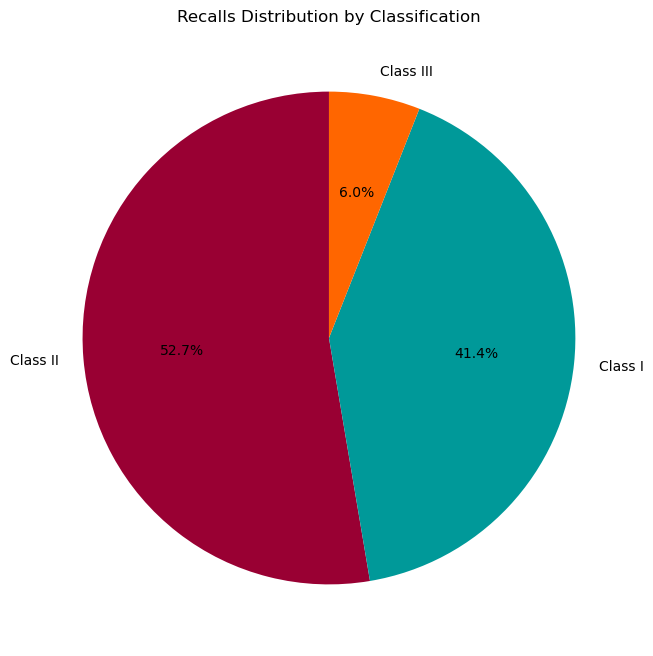

Table created successfully!
Data loaded to PostgreSQL successfully!


In [1]:
%run ./x22163549_Ashlyn_fda_extraction_preprocessing_visualization_loading.ipynb

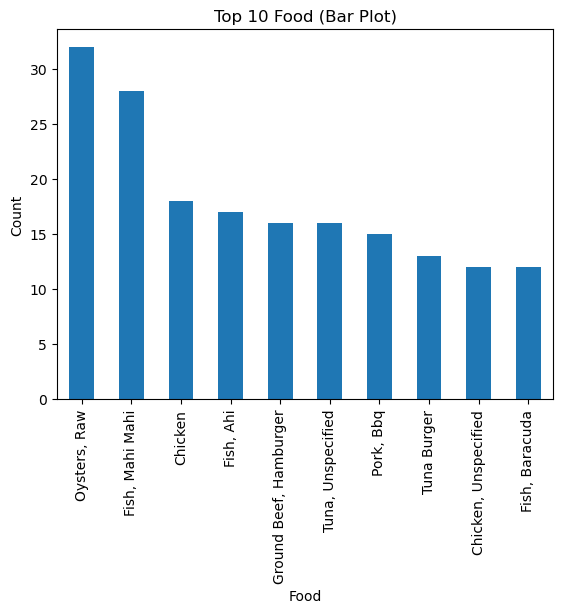

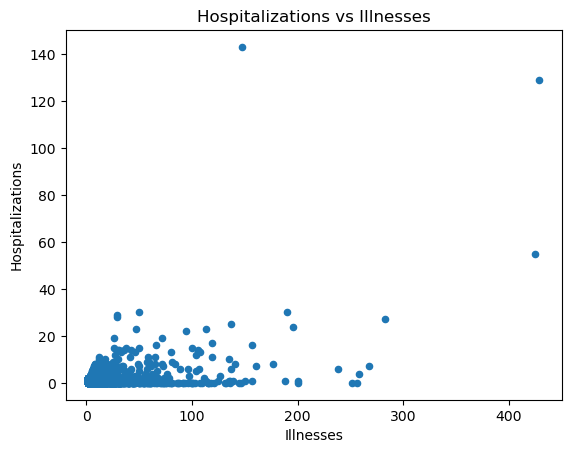

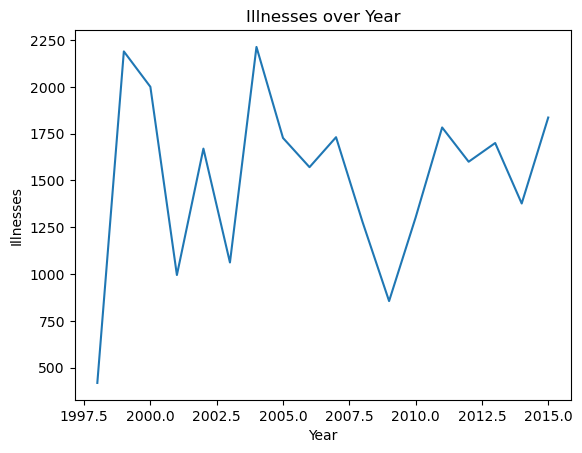

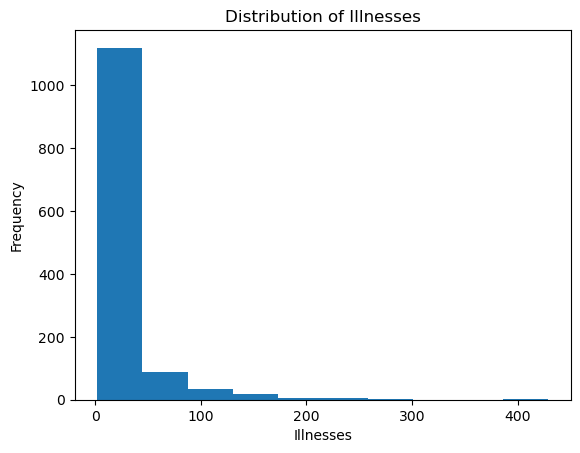

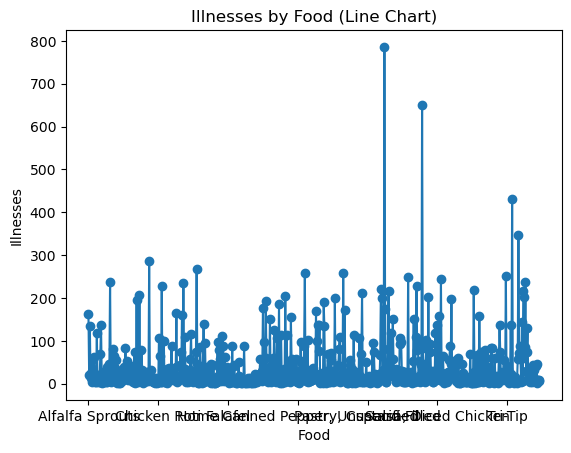

Table created successfully!
Data loaded to PostgreSQL successfully!


In [5]:
%run ./x22142258_Preetham_Disease_PreProcessing_Visualization_Loading.ipynb

In [4]:
%run ./db_connections.ipynb